# Real Time Sentiment Analysis using Twitter Tweepy

![](https://analyticslearn.com/wp-content/uploads/Sentiment-Analysis-Comprehensive-Guide-on-NLP-2-1.png)

# Credit : Developer Ashish YouTube Channel 

# Twitter Data Sentiment Analysis
* 1) Twitter Data: First step is to gather twitter data
* 2) Sentiment: To find out sentiment
* 3)Analysis: To do analysis

In [32]:
print("Jai Shri Ram")

Jai Shri Ram


In [33]:
!pip install tweepy

In [34]:
!pip install textblob

## Important Libraries

In [35]:
!pip install --upgrade numpy

In [36]:
import tweepy #to gather twitter data
import numpy as np
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

## Getting Twitter api and configuration

In [37]:
#Twitter API Credentials
APIkey = "SuQmfKF05Gx1aBtCrPMPaHcUL"
APISecretkey= "3A0wHHqMFE3lEjqejgyRzvo3I9n7VdznNQS8TkJ29ugAmj55UQ"
accessToken = "786256038076948480-J1CDyu3Pa0LgMlKtwXXChCpV9gZyFLH"
accesTokenSecret="K3IucF2liqyBJ35je7mDcxW0Wg44h1FMfWjSevkBmLvte"

## Create the authentication object

In [38]:
#Create the authentication object

authenticate = tweepy.OAuthHandler(APIkey, APISecretkey)
authenticate.set_access_token(accessToken, accesTokenSecret)
api = tweepy.API(authenticate)

## Fetching

In [39]:
posts = api.user_timeline(screen_name = 'Trump', count = 100, lang = "en",tweet_mode ='extended')
# posts = api.search_tweets("Trump", count = 100, lang ='en', tweet_mode ='extended')

In [40]:
i=1
for tweets in posts[:10]:    #top 10 tweets
    print(str(i) + ')'+ tweets.full_text + '\n')
    i=i+1

1)RT @TrumpGolf: Dustin does it again! Congratulations on securing your 2nd @livgolf_league individual win in Tulsa! Next stop: @TrumpGolfDC.…

2)Today we celebrate and honor all moms, and especially the moms whose love and support make our Trump Organization family a whole. Happy #MothersDay to you! https://t.co/CQyNkEfY8a

3)Who's ready to bring the energy? Round Two of the @Aramco_Series kicks off next Friday at @TrumpPalmBeach! Purchase tickets to experience the action-packed event: https://t.co/5T94qon1jg. https://t.co/Cv1ZF3agqf

4)This week President Donald Trump and @EricTrump enjoyed a phenomenal visit to @TrumpScotland, @TrumpTurnberry  and @TrumpDoonbeg. From breaking ground on a new course to experiencing local traditions and time spent with our incredible teams, this was a truly momentous occasion! https://t.co/DO3denkNaa

5)We are thrilled to announce that @TrumpTurnberry has won "Best Five-Star Hotel" in the 2023 Scotland Prestige Hotel Awards! This property is truly out

# # Create a data frame with a column called tweets

In [41]:
Tweets = []
for tweet in posts:
    Tweets.append([tweet.full_text])

df = pd.DataFrame(Tweets, columns=["Tweets"])

# Print the data frame
print(df.head(10))

                                              Tweets
0  RT @TrumpGolf: Dustin does it again! Congratul...
1  Today we celebrate and honor all moms, and esp...
2  Who's ready to bring the energy? Round Two of ...
3  This week President Donald Trump and @EricTrum...
4  We are thrilled to announce that @TrumpTurnber...
5  In one month, we will host the best of the Lad...
6  Get ready: @livgolf_league is coming to @Trump...
7  It's time to pamper your favorite furry friend...
8  This month we hosted our 2023 Trump Golf Summi...
9  RT @TrumpGolf: A look back at our 2023 Trump G...


In [42]:
# # Create a data frame with a column called tweets

# df = pd.DataFrame([tweets.full_text for tweet in posts], columns = ['Tweets'])

## We need to clean the data.

In [43]:
# dir(re)

## Cleaning

In [44]:
#funtion to clean fetched tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0-9]+','',text) #removing mentions
    text = re.sub("#", ' ', text) # removing#
    text = re.sub('RT[\s]+',' ',text)  #removing Retweets
    text = re.sub('https?:\/\/\S+',' ',text) #removing inks 
    return text

In [45]:
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [46]:
df.head()

,Tweets
0,: Dustin does it again! Congratulations on se...
1,"Today we celebrate and honor all moms, and esp..."
2,Who's ready to bring the energy? Round Two of ...
3,This week President Donald Trump and enjoyed ...
4,"We are thrilled to announce that has won ""Bes..."


In [47]:
analysis = TextBlob("Today was the best day")

#### polarity tells how much percentage it is positive or negativd
#### subjectivity=0.3 means it express some personal feelings, view, or belif

In [48]:
analysis.sentiment 

Sentiment(polarity=1.0, subjectivity=0.3)

## create a funtion to get the subjectivity of all the tweets 

In [49]:
# create a funtion to get the subjectivity of all the tweets 

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a funtion to get the polarity of all the tweets 

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [50]:
# create 2 columns 'subjectivity' and 'polarity'

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


In [51]:
df.iloc[0]

Tweets           : Dustin does it again! Congratulations on se...
Subjectivity                                                  0.2
Polarity                                                     0.25
Name: 0, dtype: object

In [52]:
df

,Tweets,Subjectivity,Polarity
0,: Dustin does it again! Congratulations on se...,0.200000,0.250000
1,"Today we celebrate and honor all moms, and esp...",0.750000,0.425000
2,Who's ready to bring the energy? Round Two of ...,0.300000,0.000000
3,This week President Donald Trump and enjoyed ...,0.442424,0.339394
4,"We are thrilled to announce that has won ""Bes...",0.755000,0.780000
...,...,...,...
95,Happy 20th Anniversary ! To all of the wonderf...,0.591667,0.508333
96,": Legendary golfer, legendary links. It was a...",1.000000,1.000000
97,SHE’S BACK!\n\n“During my four years in the WH...,0.316667,0.233333
98,Celebrating 246 years of our great nation. Fro...,0.750000,0.766667


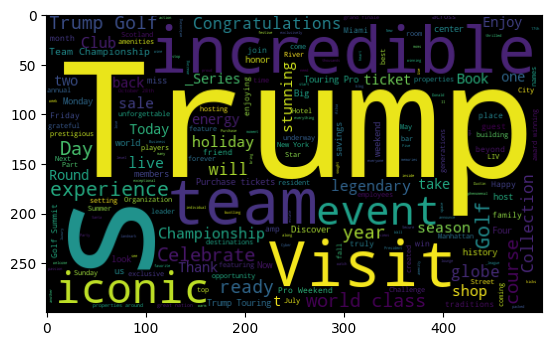

In [53]:
#Word Cloud Visualization
allwords = ' '.join([i for i in df['Tweets']])
Cloud = WordCloud(width = 500, height =300, random_state = 0).generate(allwords)

plt.imshow(Cloud)
plt.show()

In [54]:
#Create a function to compute negative, neutral and positive 

def getAnalysis(score):
    if score<0:
        return "Negative"
    elif score==0:
        return "Neutral"
    else:
        return "Positive"
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [55]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,: Dustin does it again! Congratulations on se...,0.200000,0.250000,Positive
1,"Today we celebrate and honor all moms, and esp...",0.750000,0.425000,Positive
2,Who's ready to bring the energy? Round Two of ...,0.300000,0.000000,Neutral
3,This week President Donald Trump and enjoyed ...,0.442424,0.339394,Positive
4,"We are thrilled to announce that has won ""Bes...",0.755000,0.780000,Positive
...,...,...,...,...
95,Happy 20th Anniversary ! To all of the wonderf...,0.591667,0.508333,Positive
96,": Legendary golfer, legendary links. It was a...",1.000000,1.000000,Positive
97,SHE’S BACK!\n\n“During my four years in the WH...,0.316667,0.233333,Positive
98,Celebrating 246 years of our great nation. Fro...,0.750000,0.766667,Positive


In [56]:
df['Analysis'].value_counts()

Positive    78
Neutral     18
Negative     4
Name: Analysis, dtype: int64

In [57]:
df[df['Analysis']=='Neutral']

,Tweets,Subjectivity,Polarity,Analysis
2,Who's ready to bring the energy? Round Two of ...,0.30,0.0,Neutral
18,,0.00,0.0,Neutral
21,,0.00,0.0,Neutral
25,: We are beyond honored to host three events...,0.00,0.0,Neutral
33,: Santa is in the building! Stop by today thr...,0.00,0.0,Neutral
41,: Santa Claus is coming to Trump Tower! Come ...,0.00,0.0,Neutral
43,Discover savings up to 70% off during ’s Cyber...,0.00,0.0,Neutral
44,Discover savings up to 75% off during ’s Cyber...,0.00,0.0,Neutral
62,: World-class golf in a world-class setting. ...,0.00,0.0,Neutral
63,: Get ready to Bring The Energy! Round Four o...,0.45,0.0,Neutral


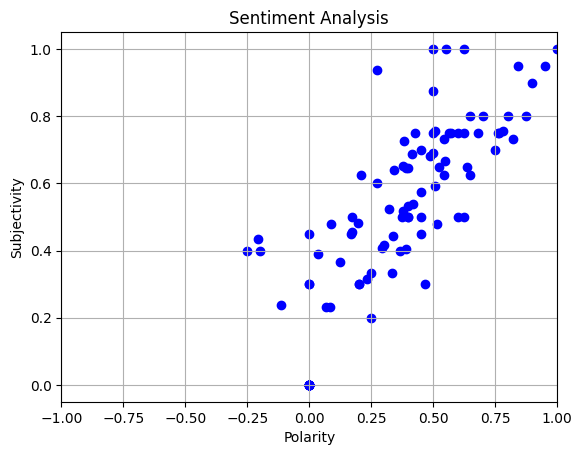

In [58]:
#polarity scatter plot
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color = 'blue')

plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid(True)
plt.show()
# only some neutral are showing because of overlapping

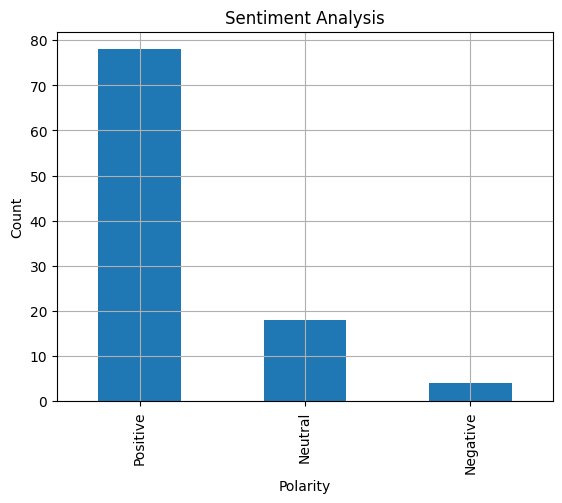

In [59]:
df['Analysis'].value_counts().plot(kind = "bar")
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [60]:
#lets get positive tweets only

i=1

sortedDF = df.sort_values(by=['Polarity'],ascending=False)

for j in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][j])=='Positive':
        print(str(i)+ ')' + sortedDF['Tweets'][j])
        print()
        i=i+1
        

1) : Dustin does it again! Congratulations on securing your 2nd _league individual win in Tulsa! Next stop: .…

2)Today we celebrate and honor all moms, and especially the moms whose love and support make our Trump Organization family a whole. Happy  MothersDay to you!  

3)This week President Donald Trump and  enjoyed a phenomenal visit to ,   and . From breaking ground on a new course to experiencing local traditions and time spent with our incredible teams, this was a truly momentous occasion!  

4)We are thrilled to announce that  has won "Best Five-Star Hotel" in the 2023 Scotland Prestige Hotel Awards! This property is truly outstanding and we are so proud of our incredible team. Congratulations!  

5)In one month, we will host the best of the Ladies European Tour during the _Series Tournament on our award-winning course at ! 

Secure your ticket for the event taking place on May 19th-21st:    

6)Get ready: _league is coming to  this May 26th-28th! Don't miss your opportunity to

In [61]:
#lets get negative tweets only

i=1

sortedDF = df.sort_values(by=['Polarity'],ascending=False)

for j in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][j])=='Negative':
        print(str(i)+ ')' + sortedDF['Tweets'][j])
        print()
        i=i+1
        

1)Savor the holidays with 25% off sitewide during ’s Black Friday sale! Visit   to shop.  

2) : Closed out day two with none other than Nelly.  knows how to throw a party!💥💥  

3) : Round Four of the _Series is almost here! 

Purchase tickets on   to experience this premier ev…

4) : Mark your calendars! Round Four of the Aramco Team Series will take place at the award-winning  in NYC from…



In [62]:
#lets get Neutral tweets only

i=1

sortedDF = df.sort_values(by=['Polarity'],ascending=False)

for j in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][j])=='Neutral':
        print(str(i)+ ')' + sortedDF['Tweets'][j])
        print()
        i=i+1
        

1)Who's ready to bring the energy? Round Two of the _Series kicks off next Friday at ! Purchase tickets to experience the action-packed event:    

2) 

3) 

4) : We are beyond honored to host three  events at our Trump Golf properties this year: , …

5) : Santa is in the building! Stop by today through Sunday to get your picture taken with our jolly ole’ friend.🎅  

6) : Santa Claus is coming to Trump Tower! Come see us and get your picture taken this Friday through Sunday (12/2-12/4) from 11…

7)Discover savings up to 70% off during ’s Cyber Monday sale! Explore the collection on    

8)Discover savings up to 75% off during ’s Cyber Monday sale! Explore the collection on    

9) : World-class golf in a world-class setting. We’re bringing the energy to  this weekend for the _Series…

10) : Get ready to Bring The Energy! Round Four of the _Series kicks off tomorrow at ! Get tickets on https…

11) : The  Miami Team Championship at  is fast-approaching and build-out is well underway! Tak

# ThankYou!
# Please Upvote This notebook if if helps You.